In [49]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

Math Methods Coursework 3 

@author: CID - 02083673
"""

import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import signal


plt.rcParams.update({'font.size': 15})

# %% Load dataset

datadir = 'data/dataset3_m62/'
trackdata = io.loadmat(datadir+'downTrackdata.mat')
phi = trackdata['phi']; x = trackdata['x']; y = trackdata['y']; r=trackdata['r'];
speed = trackdata['speed']; t = trackdata['time'];
spikedata = io.loadmat(datadir+'spikes.mat')
spikes = spikedata['spikes']
params = spikedata['params']
fluodata = io.loadmat(datadir+'fissa_output.mat')
dFonF = fluodata['ddf_f'] # fluorescence time-series variable
C = np.size(dFonF,0) # number of cells
fs = 30.92 # sampling rate in Hz - everything is resampled at this rate
L = np.size(dFonF,1)
t = np.linspace(0,L*1/fs,L) # duration of recording in sec

# %% Useful functions provided

# function to break up the fluorescence response of each cell into laps
# takes as input:
# sp: a vector of a cell's activity binarized into 0,1 (spiking/not-spiking) 
# phi_bin: sequence of angular position values, binned into nphi bins
# nlaps: 
def get_lapresponse(sp,phi_bin,nlaps,nphi):
    r = np.zeros((nlaps,nphi))
    lap=0
    phi0=phi_bin[0]
    lapflag=True  # flag to ensure we only increment lap counter on first time in bin
    for i in range(0,L):
        if  sp[i]:
            r[lap][phi_bin[i]-1] += 1
        # and augment lap counter
        if (phi_bin[i]==phi0 and lapflag==True):
            lap += 1
            lapflag=False # put down flag until we are past this bin
            #print(lap)
        if phi_bin[i]>phi0:
            lapflag=True

    return r

# %% some basic processing you will need
# bin the spatial variable phi
nbins_phi = 20
edges = np.arange(0,360,360/nbins_phi)
phi_bin = np.digitize(phi,edges)

# then how many laps does the mouse do?
# use big jumps in position to mark clocking around circular path
dphi = np.diff(phi_bin,axis=0)
# plt.plot(t[:-1],dphi,'r-')
nlaps = np.count_nonzero(dphi>10)+2 # a bit of a hack, sorry - but this works

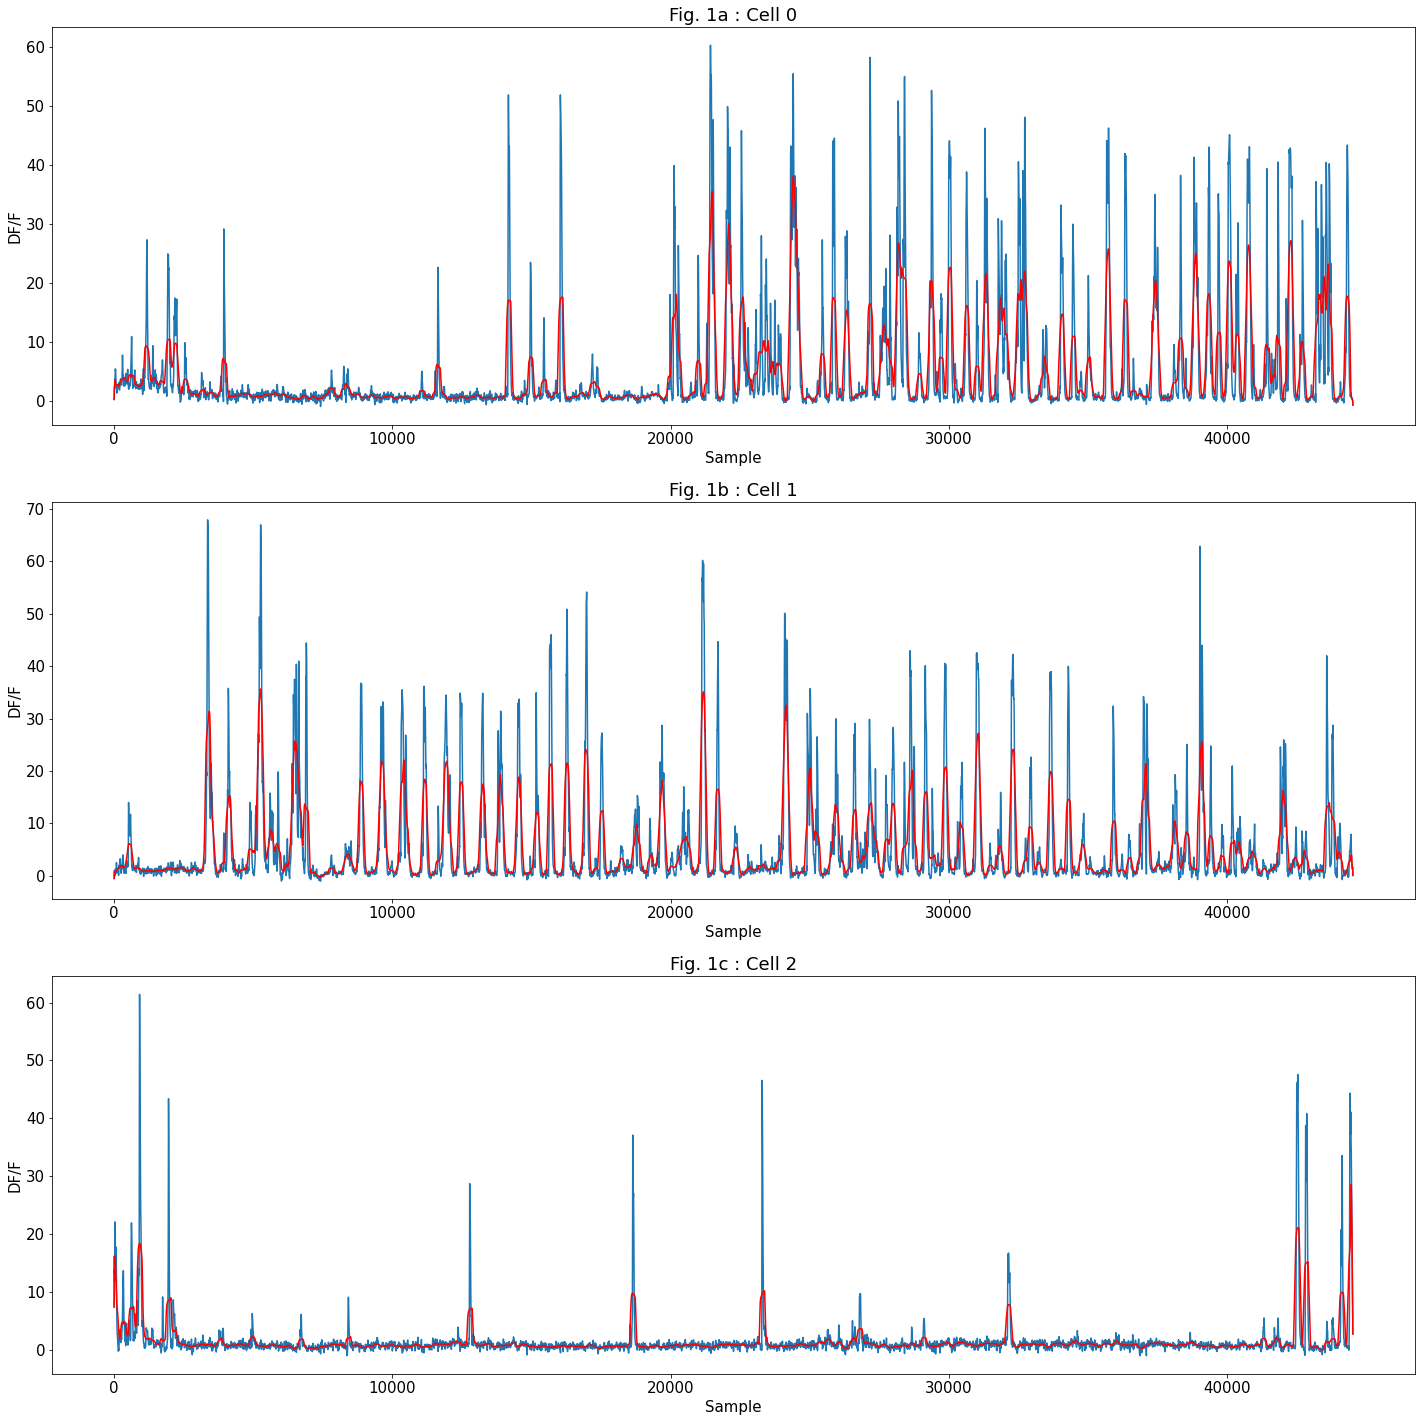

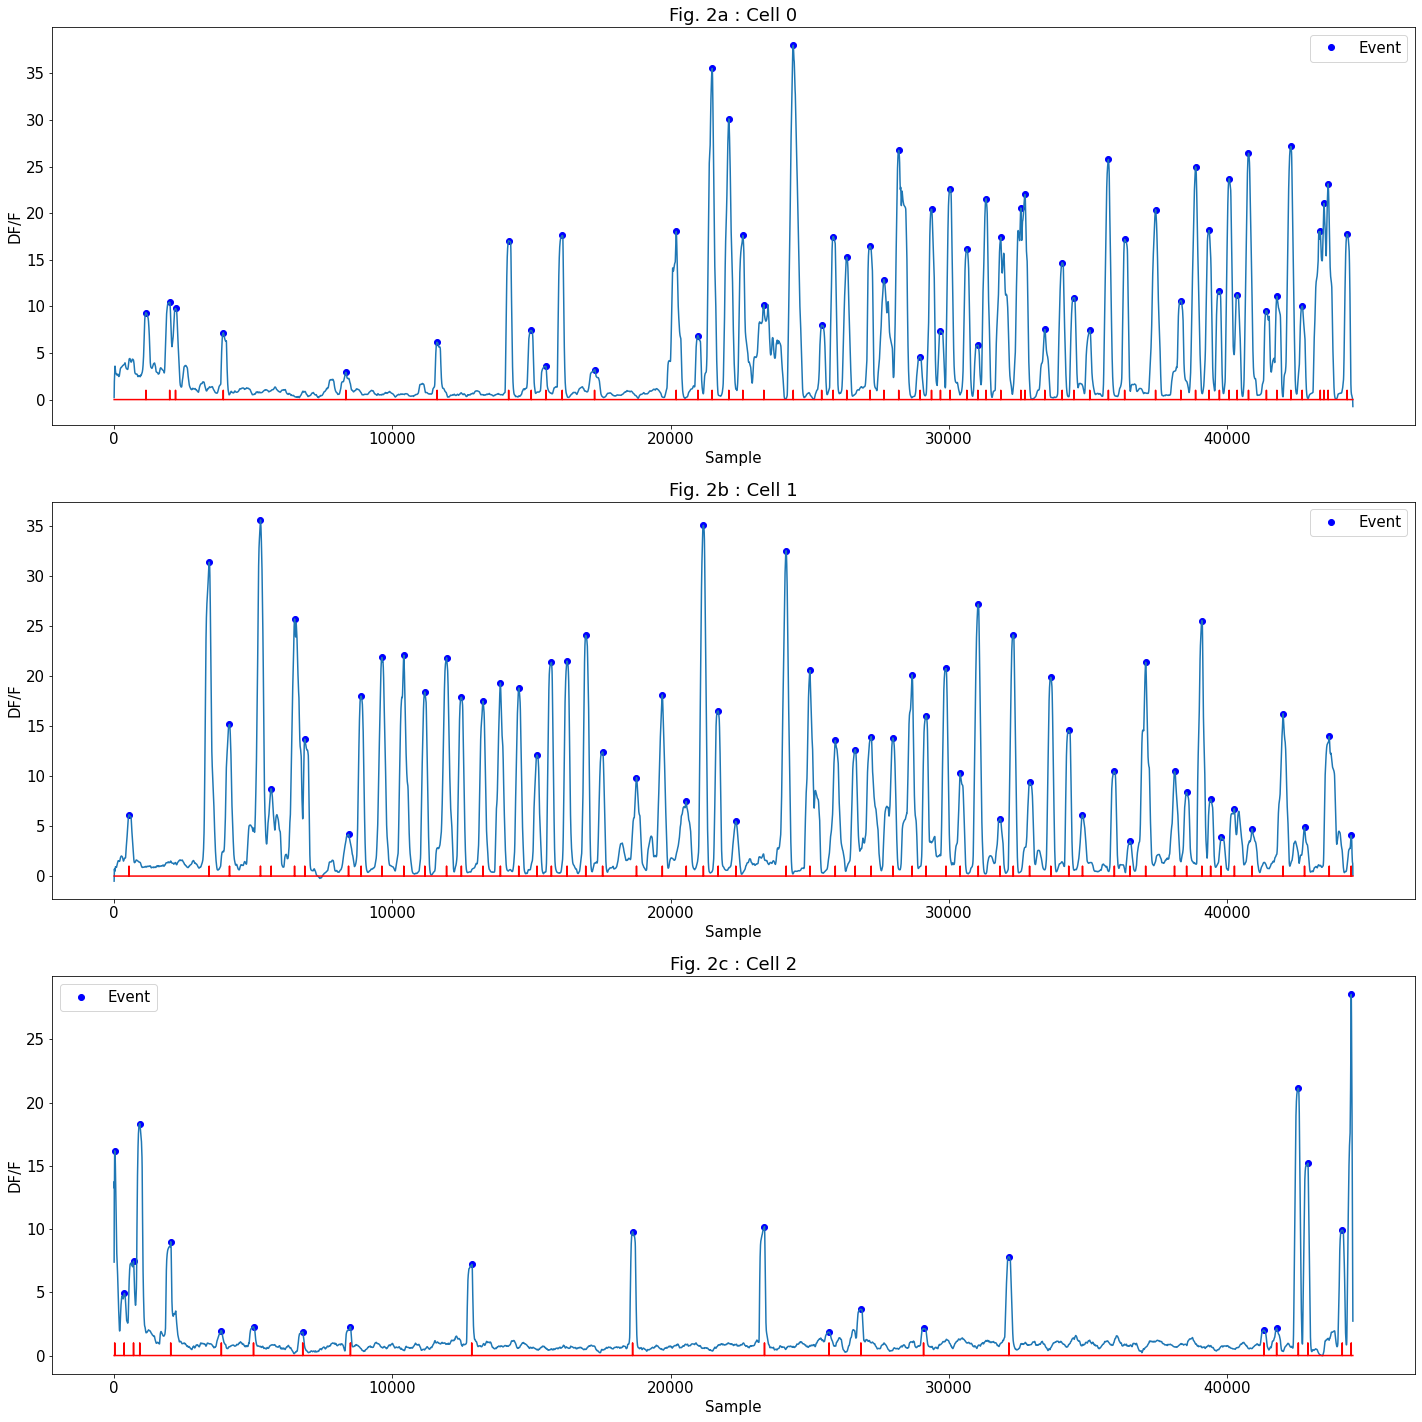

In [55]:
#%% Task 1 - Create a function to convert time seris to spike trains and plot
# with over or underlay to show activity and rest
spikeTrain0 = np.zeros(L)
spikeTrain1 = np.zeros(L)
spikeTrain2 = np.zeros(L)

x0 = dFonF[0,:]
x1 = dFonF[1,:]
x2 = dFonF[2,:]


def smooth(a, WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a, np.ones(WSZ, dtype=int), 'valid')/WSZ
    r = np.arange(1, WSZ-1, 2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((start, out0, stop))

def spikeTrainCreator(nSig): 
#I created the function here as asked but I have used
#prominence which changes for each cell (i found it more accurate to find peaks) , therefore I hope this is 
# sufficient to show i can create a function for my code but am choosing to do it manually underneath. 
#Further, I need the function for Q5.

    spikeTrain = np.zeros(L)
    smSig = smooth(nSig,201)
    peaks, _ = find_peaks(smSig, prominence=2.5)
    lp = np.size(peaks)
    for i in range(0,lp):
        spikeTrain[peaks[i]] = 1

    return(spikeTrain)    


x0smooth = smooth(x0, 201)
x1smooth = smooth(x1, 201)
x2smooth = smooth(x2, 201)

peaksx0, _ = find_peaks(x0smooth, prominence=2.5) #1.5
peaksx1, _ = find_peaks(x1smooth, prominence=2.5) #1.5
peaksx2, _ = find_peaks(x2smooth, prominence=1.4) #1.2


Lp0 = np.size(peaksx0)
Lp1 = np.size(peaksx1)
Lp2 = np.size(peaksx2)

for i in range(0,Lp0):
    spike = peaksx0[i]
    spikeTrain0[spike] = 1
    
for i in range(0,Lp1):
    spike = peaksx1[i]
    spikeTrain1[spike] = 1
    
for i in range(0,Lp2):
    spike = peaksx2[i]
    spikeTrain2[spike] = 1

plt.figure(1,[20,20])
plt.subplot(3,1,1)
plt.plot(x0)
plt.plot(x0smooth, 'r')
plt.xlabel('Sample')
plt.ylabel('DF/F')
plt.title('Fig. 1a : Cell 0')
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(x1)
plt.plot(x1smooth, 'r')
plt.xlabel('Sample')
plt.ylabel('DF/F')
plt.title('Fig. 1b : Cell 1')
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(x2)
plt.plot(x2smooth, 'r')
plt.xlabel('Sample')
plt.ylabel('DF/F')
plt.title('Fig. 1c : Cell 2')
plt.tight_layout()



plt.figure(2, [20,20])
plt.subplot(3,1,1)
plt.plot(peaksx0, x0smooth[peaksx0], "ob"); plt.plot(x0smooth); plt.legend(['Event'])
plt.plot(spikeTrain0, 'r')
plt.xlabel('Sample')
plt.ylabel('DF/F')
plt.title('Fig. 2a : Cell 0')
plt.tight_layout()

plt.subplot(3,1,2)
plt.plot(peaksx1, x1smooth[peaksx1], "ob"); plt.plot(x1smooth); plt.legend(['Event'])
plt.plot(spikeTrain1, 'r')
plt.xlabel('Sample')
plt.ylabel('DF/F')
plt.title('Fig. 2b : Cell 1')
plt.tight_layout()

plt.subplot(3,1,3)
plt.plot(peaksx2, x2smooth[peaksx2], "ob"); plt.plot(x2smooth); plt.legend(['Event'])
plt.plot(spikeTrain2, 'r')
plt.xlabel('Sample')
plt.ylabel('DF/F')
plt.title('Fig. 2c : Cell 2')
plt.tight_layout()


Task 1: 

The following task asked for the digitization of Cells 0,1 and 2 with the use of a self produced function. 
To begin, the signals are preprocessed (smoothed) in order to help with peak detection. The number for window was found via inspection. The first figure shows us how the smoothed signal compares against the original and it is clear that the larger spikes are not attenuated, this is especially useful when we have local maximas which we are ignoring. The next figure shows all three cells with peaks identified with a small blue dot, and overlayed is the corresponding binary plot in red. A debate could be had about the use of smoothing, sometimes it is very good i.e. When we have repeated spikes in one transient, we would like to just lump it as one event not multiple and this function seems to do that along with minimising the noise however I could be losing information that I do not even know off. I feel that from inspection of these three cells it is justifiable to use this pre-processing but likely not the wisest choice for every cell without proper analysis.

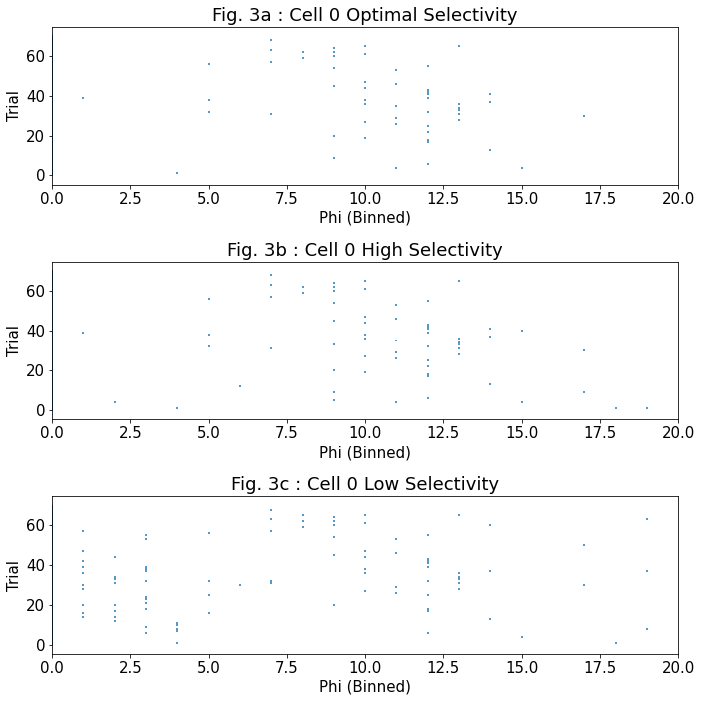

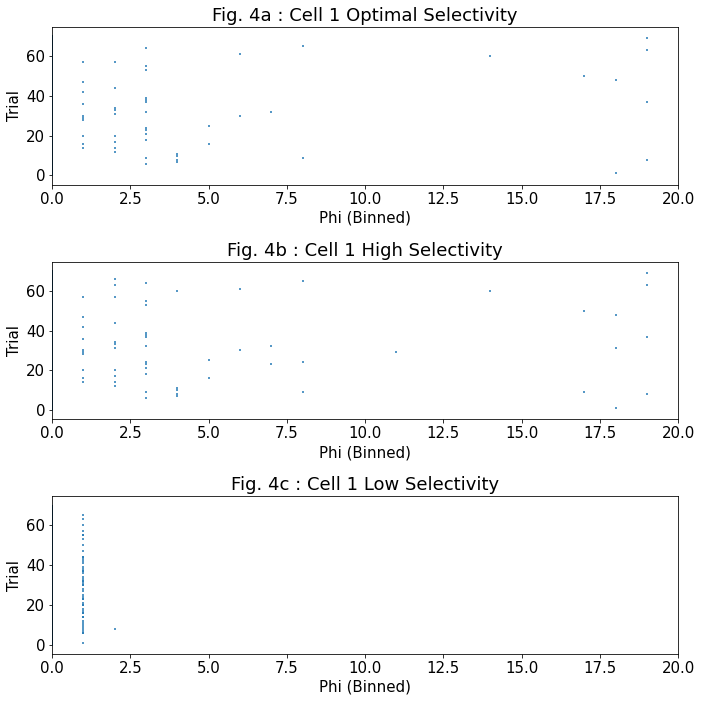

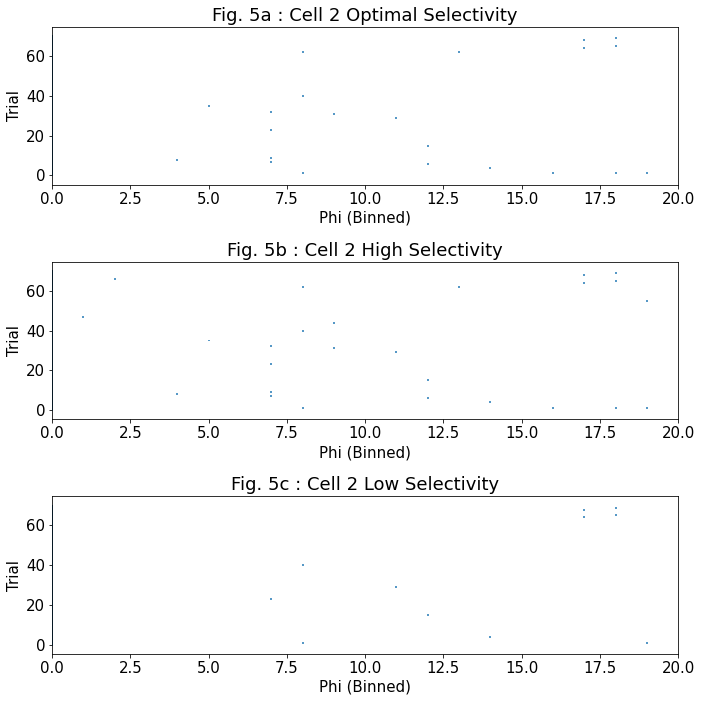

In [51]:
# %% Task 2 
# As described in previous coursework exercises (particularly Coursework One),
# the data is collected from a mouse running in repeated loops around a 
# circular track. Write a function which returns the data for a cell in the 
# form response[trial,position], where trial indicates which loop around the 
# track the mouse is on, position indicates the binned spatial angle of the 
# mouse’s location, and response is 0 or 1 as above. Plot this as a `rastergram’ 
# (ticks indicating events on axes showing trials (y axis) vs angular location 
# (x axis)) for three example cells showing high, medium and low selectivity 
# of the firing of the cell to the mouse’s location on the circular track. 
# Show this rastergram for the same three cells (cells 0,1,2).
def spikeTrainCreator(nSig, p): 
    spikeTrain = np.zeros(L)
    smSig = smooth(nSig,201)
    peaks, _ = find_peaks(smSig, prominence=p)
    lp = np.size(peaks)
    for i in range(0,lp):
        spikeTrain[peaks[i]] = 1
    return(spikeTrain)  


nphi = 20
oneHigh = get_lapresponse(spikeTrainCreator(dFonF[0,:], 1), phi_bin, nlaps, nphi)
oneMedium = get_lapresponse(spikeTrain0, phi_bin, nlaps, nphi)
oneLow = get_lapresponse(spikeTrainCreator(dFonF[0,:], 5), phi_bin, nlaps, nphi)

twoHigh = get_lapresponse(spikeTrainCreator(dFonF[1,:], 1), phi_bin, nlaps, nphi)
twoMedium = get_lapresponse(spikeTrain1, phi_bin, nlaps, nphi)
twoLow = get_lapresponse(spikeTrainCreator(dFonF[1,:], 5), phi_bin, nlaps, nphi)

threeHigh = get_lapresponse(spikeTrainCreator(dFonF[2,:], 1), phi_bin, nlaps, nphi)
threeMedium = get_lapresponse(spikeTrain2, phi_bin, nlaps, nphi)
threeLow = get_lapresponse(spikeTrainCreator(dFonF[2,:], 5), phi_bin, nlaps, nphi)



for i in range(0,20):
    for a in range(0,71):
        if oneHigh[a,i] >= 1:
            oneHigh[a,i] = i  
        if oneMedium[a,i] >= 1:
            oneMedium[a,i] = i
        if oneLow[a,i] >= 1:
            oneLow[a,i] = i
            
        if twoHigh[a,i] >= 1:
            twoHigh[a,i] = i              
        if twoMedium[a,i] >= 1:
            twoMedium[a,i] = i
        if twoLow[a,i] >= 1:
            oneLow[a,i] = i  

        if threeHigh[a,i] >= 1:
            threeHigh[a,i] = i              
        if threeMedium[a,i] >= 1:
            threeMedium[a,i] = i 
        if threeLow[a,i] >= 1:
            threeLow[a,i] = i  
            

plt.figure(3,[10,10])

plt.subplot(3,1,1)
plt.eventplot(oneMedium)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 3a : Cell 0 Optimal Selectivity')

plt.subplot(3,1,2)
plt.eventplot(oneHigh)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 3b : Cell 0 High Selectivity')

plt.subplot(3,1,3)
plt.eventplot(oneLow)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 3c : Cell 0 Low Selectivity')
plt.tight_layout()

plt.figure(4,[10,10])

plt.subplot(3,1,1)
plt.eventplot(twoMedium)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 4a : Cell 1 Optimal Selectivity')

plt.subplot(3,1,2)
plt.eventplot(twoHigh)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 4b : Cell 1 High Selectivity')

plt.subplot(3,1,3)
plt.eventplot(twoLow)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 4c : Cell 1 Low Selectivity')
plt.tight_layout()

plt.figure(5, [10,10])

plt.subplot(3,1,1)
plt.eventplot(threeMedium)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 5a : Cell 2 Optimal Selectivity')

plt.subplot(3,1,2)
plt.eventplot(threeHigh)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 5b : Cell 2 High Selectivity')

plt.subplot(3,1,3)
plt.eventplot(threeLow)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 5c : Cell 2 Low Selectivity')
plt.tight_layout()


Task 2: 

Task 2 entails producing a rastergram of Cells 0,1 and 2, with axis of Trial against Angle. The task has been achieved as shown above, it is clear that specific spikes occur at specific spatial angles. The function has been provided to us and is not of my own work. The task has asked for "High, medium and low selectivity of firing rate", and this attempt has been facilitated with the understanding that firing rate selection is based on my peak selection code from Task 1, therefore If we change the prominences, we will select for more or less events that may be Calcium Fluorescence/Activity. Nonetheless, if the logic is incorrect, the first plot for every subplot (Cell X Optimal Selectivity) uses the optimal prominence that I have found from Task 1. 

In [52]:
# %% Task 3 
# For these 3 cells, calculate the mutual information between the binary response 
# variable and spatial angle, phi. Use 20 bins for spatial angle. Does this 
# correspond to what you expect based on the previous plots? Use the “plugin” 
# estimator for mutual information (i.e. direct implementation using the 
# Shannon formula), and write your own function for estimating mutual information.
# [30 marks]

def entropy(px):
    idx = px>0
    H = -np.sum( px[idx] * np.log2(px[idx]) ) # This just takes the entropy formula and gets rid of the px=0 terms
    return H

def MInformation(spikeTrain, N, phi_bin):
    
    flatphi = phi_bin.flatten()
    spikeTrain = spikeTrain.flatten()
    
    cPhi,bins = np.histogram(flatphi,N) # Convert data into probabilities
    cSpike,bins = np.histogram(spikeTrain,N)
    cPS,bins_p,bins_s = np.histogram2d(flatphi,spikeTrain,N)
    Pp = cPhi / cPhi.sum()
    Ps = cSpike / cSpike.sum()
    Pps = cPS / cPS.sum()

    Hp = entropy(Pp)
    Hs = entropy(Ps)
    Hps = entropy(Pps)
    I = Hp + Hs - Hps
    return(I)

I0 = MInformation(spikeTrain0, 100, phi_bin)
I1 = MInformation(spikeTrain1, 100, phi_bin)
I2 = MInformation(spikeTrain2, 100, phi_bin)

print('Information for Cell0 = %s' %(I0))
print('Information for Cell1 = %s' %(I1))
print('Information for Cell2 = %s' %(I2))



Information for Cell0 = 0.0011892156218609173
Information for Cell1 = 0.0015663956895233255
Information for Cell2 = 0.0003983671539895539


Task 3: 

Mutual information was calculated with a plugin method, which as we learnt, is the method of simply plugging the numbers into the Shannon Entropy Equation, and then the Mutual Information Equation. Of course, numbers are found through probability distributions calculated and then placed into the formula. A function is made above to make this easier and quicker. 

This task has been very interesting as we are mathematically assessing what we can see in the rastergram. Mutual information is essentially, what does X tell me about Y. Now, looking at the figures from Task 2, I can see different patterns (vaguely of course) for each Cell, I will characterise these: 
Cell 0 Optimal Selectivity seems to show higher firing rates during bins 6-14 and they are quite clustered along all laps.
Cell 1 Optimal Selectivity indicates early spatial firing from bins 0-5.
Cell 2 Optimal Selectivity shows quite random firing, a pattern is not discernible. 

Now, why did I explain my observation? Because I believe the mutual information will reflect something similar. Just looking at the figure, I would hypothesise that Cell 0 or 1 will have the highest Mutual Information and last will be Cell 2. 

What we see from the result is inline with this rather vague hypothesis, but interestingly illustrates the use of Mutual Information in a practical sense. 


Task 4 : Comment on whether your estimates of mutual information above are likely to be biased, and if so, by how much?

I am actually very unsure, I am sure I am missing information but from what I understand is that bias is the difference from the average estimated information across N from the true information and in this case I assume it must be low as there has been so much data used (44520 samples across 71 laps).

Magnitude of bias is inversely proportional to number of trials [1], therefore if I assume laps is the number of trials then 1/71 laps. To me, this seems quite low. 



Text(0.5, 1.0, 'Fig. 7 : Cell 84: Maximum Spatial Information')

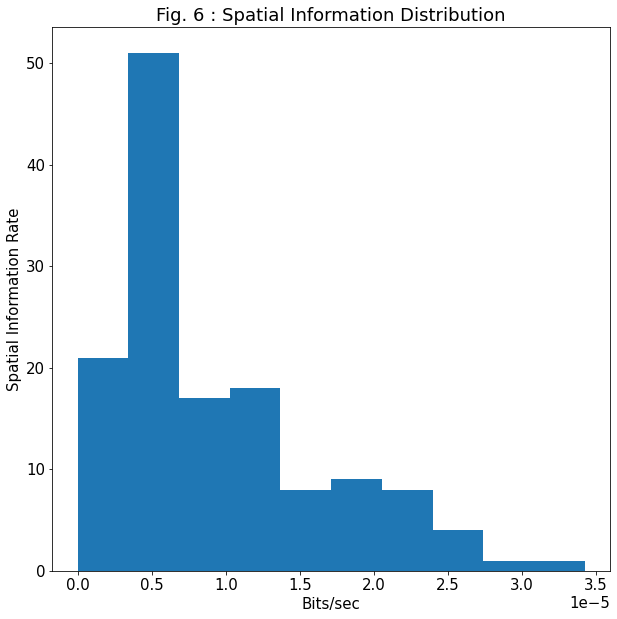

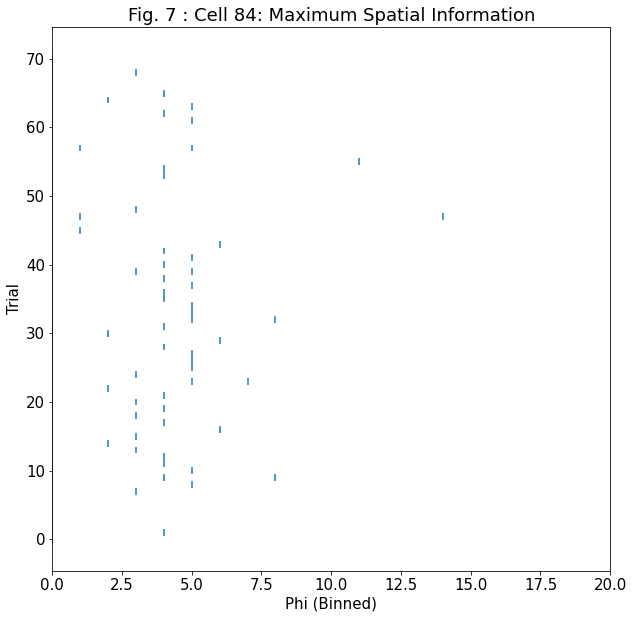

In [53]:
# %% Task 5 
# Caclculate the spatial information rates for all the cells, and plot the 
# distribution. The x-axis of your distribution plot should be in units of bits/sec 
# (take the information rate as the Shannon mutual information divided by the 
# response bin width in seconds). Show the rastergram for the cell with the
# highest spatial mutual information (from all 138 cells). What is it about the 
# response of this cell which improves its information rate compared to the three 
# examples you looked at in 3? [10 marks]
def spikeTrainCreator(nSig): 
#I created the function here as asked but I have used
#prominence which changes for each cell (i found it more accurate to find peaks) , therefore I hope this is 
# sufficient to show i can create a function for my code but am choosing to do it manually underneath. 
#Further, I need the function for Q5.

    spikeTrain = np.zeros(L)
    smSig = smooth(nSig,201)
    peaks, _ = find_peaks(smSig, prominence=2.5)
    lp = np.size(peaks)
    for i in range(0,lp):
        spikeTrain[peaks[i]] = 1

    return(spikeTrain)   

binWidth = (44520*(1/fs))/20
spikeTrain = np.zeros([138,44520])
I = np.zeros(138)
spatialInfo = np.zeros(138)
for i in range(0,137):
    spikeTrain[i,:] = spikeTrainCreator(dFonF[i,:])
    I[i] = MInformation(spikeTrain[i,:], 100, phi_bin)
    spatialInfo[i] = I[i]/binWidth
    
plt.figure(6, [10,10])
plt.hist(spatialInfo)  
plt.xlabel('Bits/sec')
plt.ylabel('Spatial Information Rate')
plt.title('Fig. 6 : Spatial Information Distribution')


maxSI = np.amax(spatialInfo)
maxSIIndex = np.where(spatialInfo == np.amax(spatialInfo))

maxSIresponse = get_lapresponse(spikeTrain[84,:], phi_bin, nlaps, nphi)

for i in range(0,20):
    for a in range(0,71):
        if maxSIresponse[a,i] >= 1:
            maxSIresponse[a,i] = i
            
plt.figure(7,[10,10])
plt.eventplot(maxSIresponse)
plt.xlim([0, 20])
plt.xlabel('Phi (Binned)')
plt.ylabel('Trial')
plt.title('Fig. 7 : Cell 84: Maximum Spatial Information')

Task 5: 

Above is a function to calculate spatial information. We are told that the unit is Bit/sec therefore it should be reasonable take the sampling frequency and multiply by the amount of samples which gives us total time elapsed over the experiment, then I divide by 20 because we have 20 phi bins. Now if i divide Mutual Information by that bin width, I should get Spatial Information.

Both functions developed over the coursework have been used for spike train generation and for mutual information. I then look for the largest Spatial information and the corresponding cell, and plot a rastergram of that cell in order to see why it is the largest. 

The question posed to me is, what makes this cells information rate improve? And I refer back to my understanding of Mutual Information: What does X tell me about Y. Here, it seems like at these angles of Phi, there is high clustering of firing rate at most laps, often successively. Entropy is reduced when there is less uncertainty. To answer the question, the clustering and more predictable firing rate reduces uncertainty and therefore increases mutual information.

[1] - Pola, Gianni & Schultz, Simon & Petersen, Rasmus & Panzeri, Stefano. (2003). A Practical Guide to Information Analysis of Spike Trains. 10.1007/978-1-4615-1079-6_10. 